# This notebook analizes the gamma backbone torsion for the rg and unmod for the central 14 steps around the lesion

# first of all, import usful libraries

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import sys, getopt

from matplotlib import pyplot
from pylab import *
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_color_codes("pastel")
sns.set(style="darkgrid")

/Users/yuqincai/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Read data, first 10 columns are for rg; second 10 clumns are for unmod

In [2]:
df=pd.read_csv("./rg14_unmod14_gamma", header=None, delim_whitespace=True).reset_index()

## I would like to check one data set to see if it looks ok and if there is any normalization needed

## Create the column names; 10 for rg, 10 for unmod

In [4]:
list1=["index"]
list2=["rg"+str(x) for x in range(67,81)]
list3=["unmod"+str(x) for x in range(67,81)]
names= list1+list2+list3

In [5]:
print names

['index', 'rg67', 'rg68', 'rg69', 'rg70', 'rg71', 'rg72', 'rg73', 'rg74', 'rg75', 'rg76', 'rg77', 'rg78', 'rg79', 'rg80', 'unmod67', 'unmod68', 'unmod69', 'unmod70', 'unmod71', 'unmod72', 'unmod73', 'unmod74', 'unmod75', 'unmod76', 'unmod77', 'unmod78', 'unmod79', 'unmod80']


## Assign column names, and review the dataframe

In [7]:
df.columns=names
print df.shape
df[:5]
print df.columns

(70000, 29)
Index([u'index', u'rg67', u'rg68', u'rg69', u'rg70', u'rg71', u'rg72', u'rg73',
       u'rg74', u'rg75', u'rg76', u'rg77', u'rg78', u'rg79', u'rg80',
       u'unmod67', u'unmod68', u'unmod69', u'unmod70', u'unmod71', u'unmod72',
       u'unmod73', u'unmod74', u'unmod75', u'unmod76', u'unmod77', u'unmod78',
       u'unmod79', u'unmod80'],
      dtype='object')


# Preview the lesion step

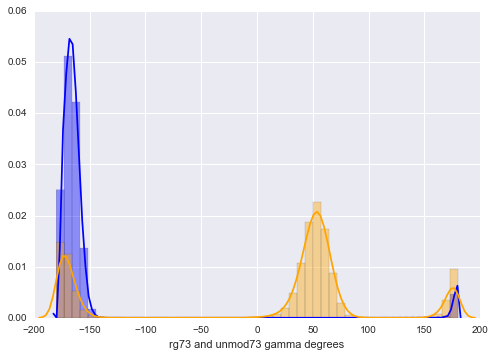

In [10]:
fig, ax = plt.subplots()
#data67=df[['rg67','unmod67']]
sns.distplot(df['rg73'],color='blue')
sns.distplot(df['unmod73'],color='orange')
ax.set_xlabel("rg73 and unmod73 gamma degrees")

# Normalize the range to -50 to 310 degrees

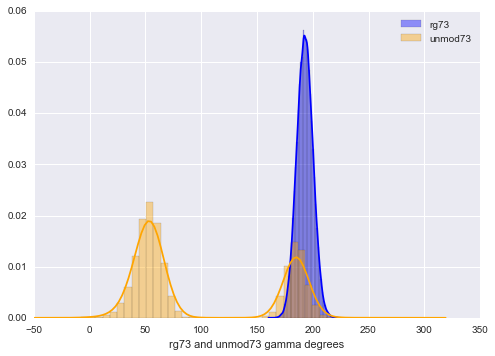

In [11]:
fig, ax = plt.subplots()
df['rg73']=df['rg73'].map(lambda x: x+360 if x <-50 else x)
df['unmod73']=df['unmod73'].map(lambda x: x+360 if x <-50 else x)
sns.distplot(df['rg73'],color='blue',label='rg73')
sns.distplot(df['unmod73'],color='orange',label='unmod73')
plt.legend()
ax.set_xlabel("rg73 and unmod73 gamma degrees")

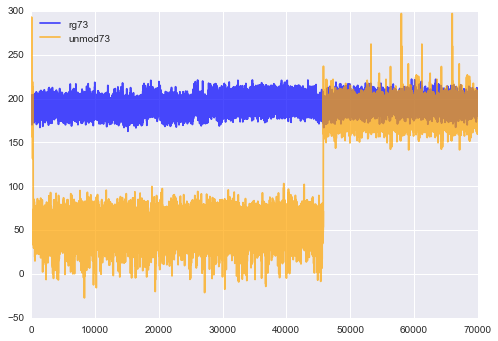

In [14]:
df_73=df[['rg73','unmod73']]
df_73.plot(color=['blue','orange'],alpha=0.7)

# I am going to define a function for this plot so that I can apply to all the 14 plots 

In [17]:
def histplot(step):
    rg='rg'+str(step)
    unmod='unmod'+str(step)
    fig, ax = plt.subplots(figsize=(10,10))
    #normalize the range 
    df[rg]=df[rg].map(lambda x: x+360 if x <-50 else x)
    df[unmod]=df[unmod].map(lambda x: x+360 if x <-50 else x)
    sns.distplot(df[rg],color='blue',bins=100,label=rg)
    sns.distplot(df[unmod],color='orange', bins=100,label=unmod)
    plt.legend()
    sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})
    ax.set_xlabel(rg +" and " + unmod + " gamma torsion in degrees")
    plt.savefig("./gamma_plots/gamma_hist_"+str(step)+".png")

## let's try it on two steps

67
68
69
70
71
72
73
74
75
76
77
78
79
80


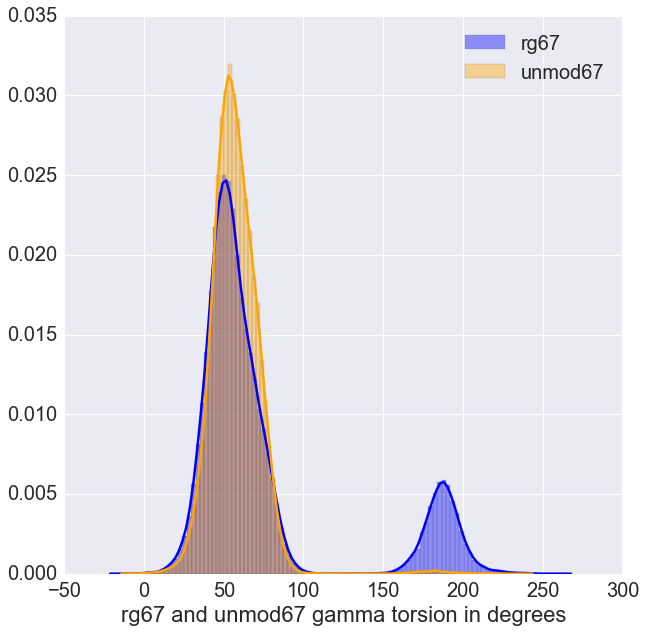

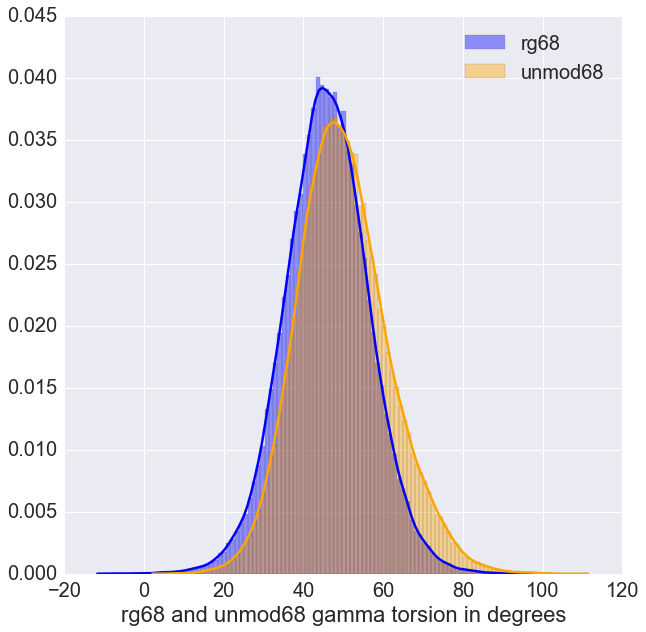

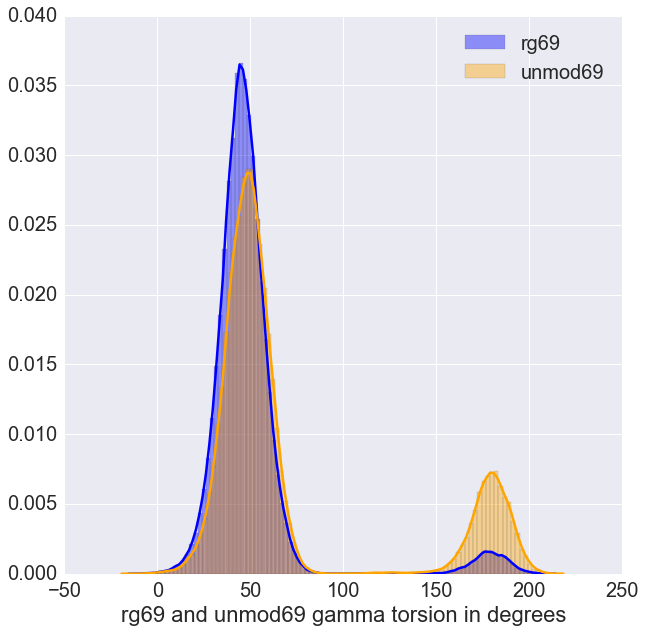

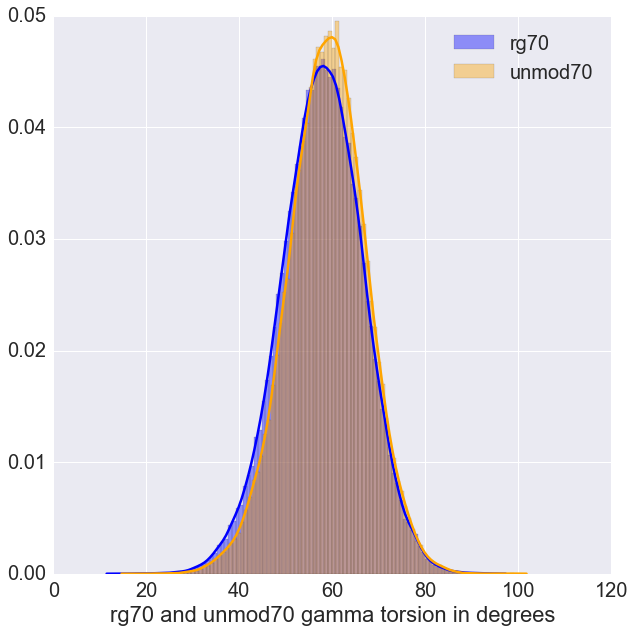

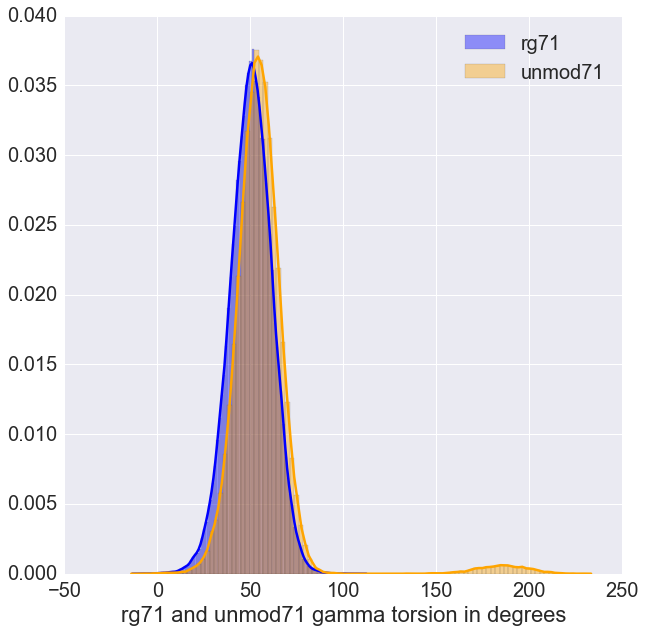

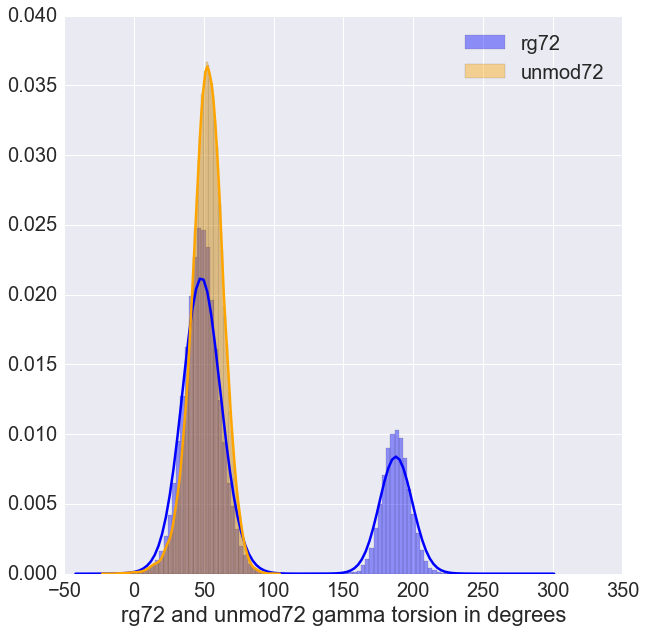

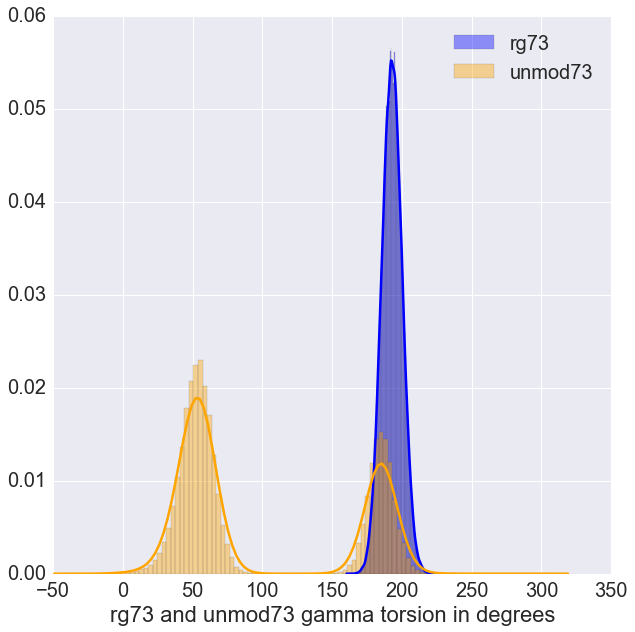

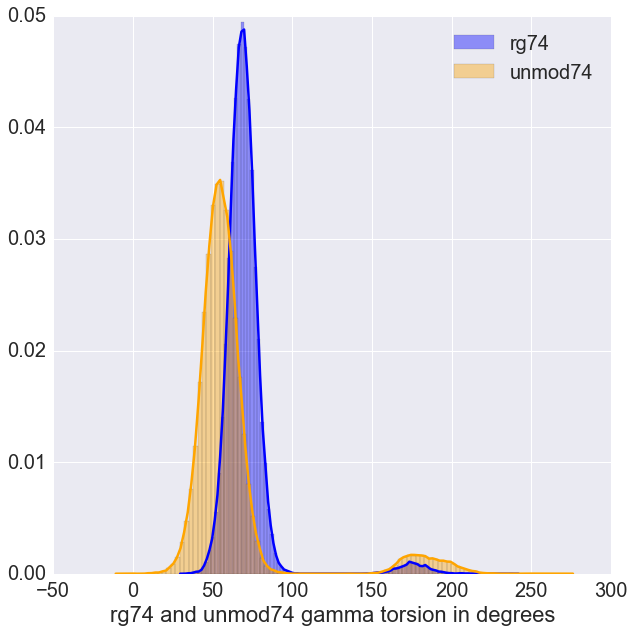

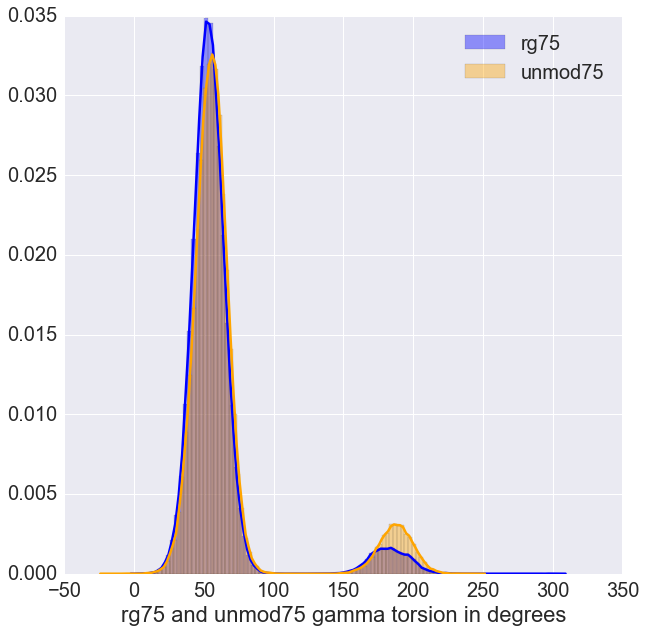

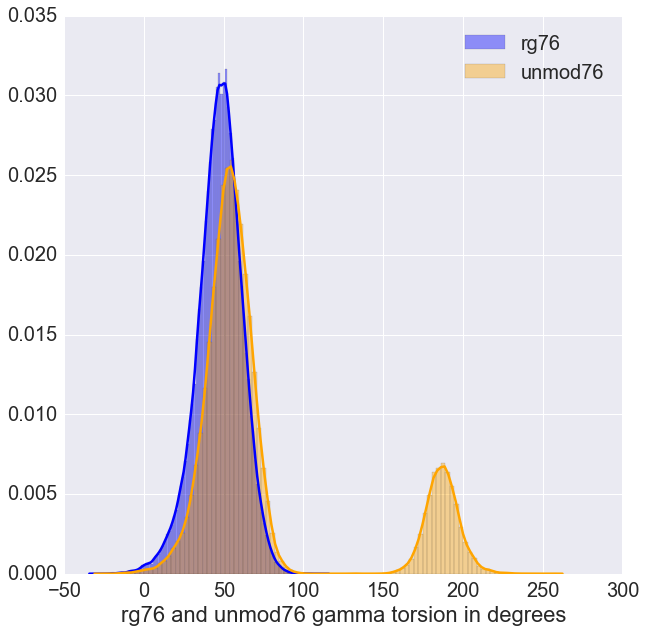

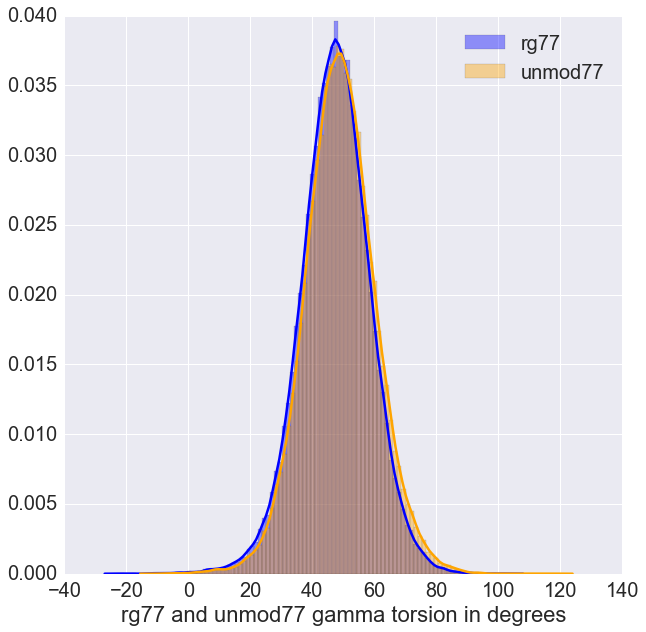

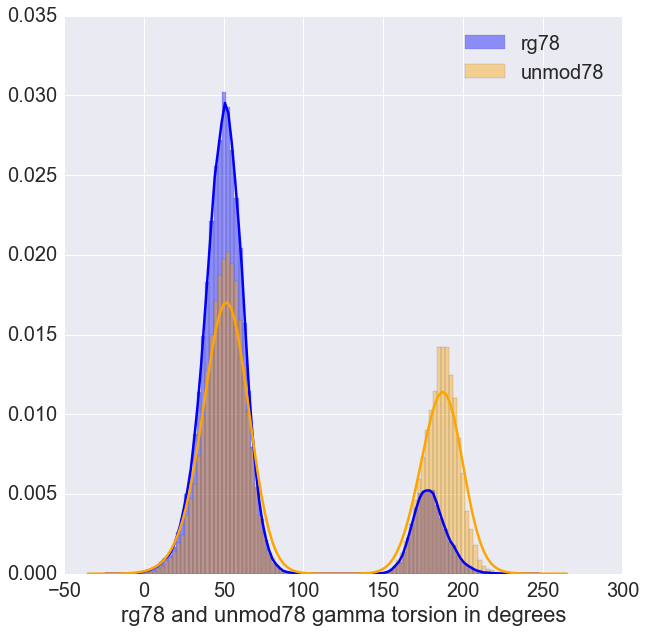

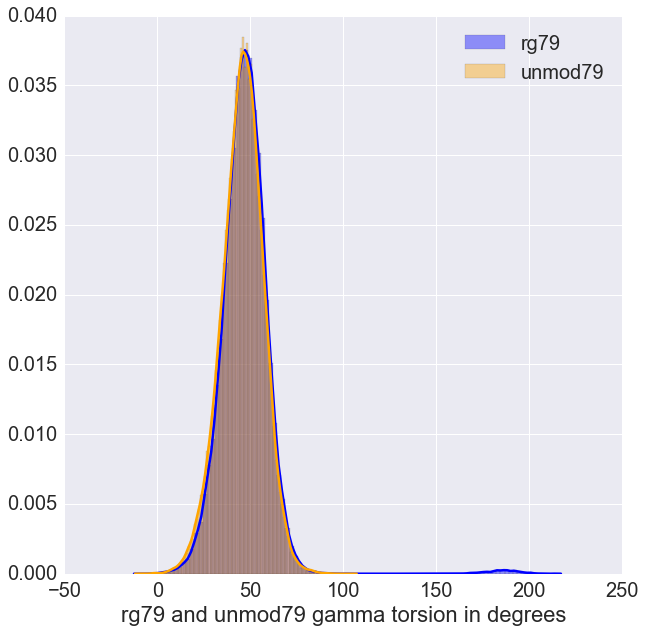

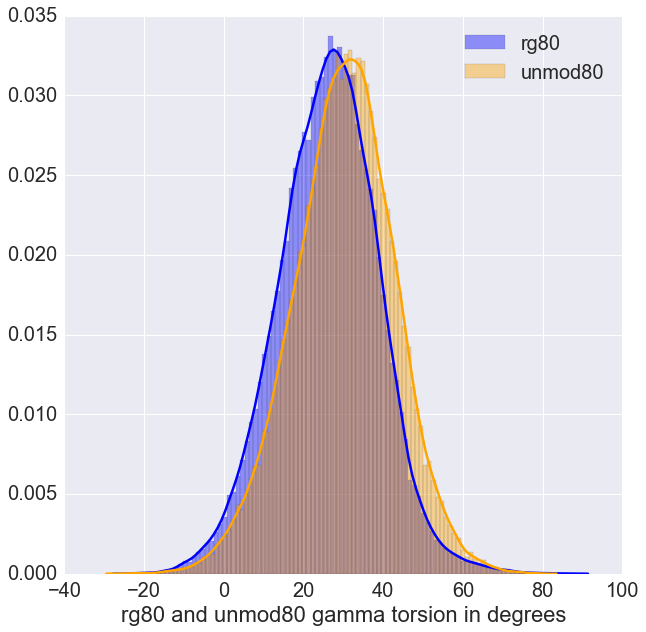

In [18]:
for i in range(67,81):
    print i
    histplot(i)